<a href="https://colab.research.google.com/github/chamithZ/BuildFlow/blob/main/chamith.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf

## Download the data set from kaggale

In [4]:
od.download('https://www.kaggle.com/datasets/erdemtaha/cancer-data/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chamithkodithuwakku
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/erdemtaha/cancer-data


100%|██████████| 48.6k/48.6k [00:00<00:00, 1.29MB/s]

## Import the Downloaded data set


In [ ]:
data_frame = pd.read_csv('/content/cancer-data/Cancer_Data.csv')
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Preproccesing and Data cleaning

## Checking the NULL values

In [ ]:
data_frame.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
data_frame.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
# get the info about the data frame
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Diagonis has a object we have to convert this to 0 and 1
data_frame['diagnosis'] = data_frame['diagnosis'].map({'M':1,'B':0})

In [ ]:
data_frame.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame.value_counts('diagnosis')

,count
diagnosis,
0,357
1,212


## Feature Selecting using the Correlation

In [ ]:
corr_m = data_frame.corr()

#plot the heat map
# plt.figure(figsize=(10,10))
# plt.imshow(corr_m,cmap='hot',interpolation='nearest')
# plt.colorbar()
# plt.show()

corr_y = corr_m['diagnosis'].sort_values(ascending=False)
corr_y

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [ ]:
# Remove the features less than 0.5
corr_target = corr_m['diagnosis']
corr_best = corr_target[corr_target > 0.5]
corr_best

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
perimeter_mean,0.742636
area_mean,0.708984
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
radius_se,0.567134
perimeter_se,0.556141
area_se,0.548236


In [ ]:
corr_best = corr_best.index
new_data_frame  = data_frame[corr_best]
new_data_frame.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


## Split the Data set

In [ ]:
from sklearn.model_selection import train_test_split

X = new_data_frame.drop('diagnosis',axis=1)
y = new_data_frame['diagnosis']

X_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# check the shapes
X_train.shape , x_test.shape ,X.shape

((455, 15), (114, 15), (569, 15))

# Create the Model architecture and compile the model


In [ ]:
# Create the model
model_optimized = tf.keras.Sequential([
    #first layer
    tf.keras.layers.Dense(128, activation='relu', input_shape=(15,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    #second layer
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    #third layer
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the optimized model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model_optimized.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the optimized model
history = model_optimized.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.5681 - loss: 0.8628 - val_accuracy: 0.4176 - val_loss: 0.7880
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8341 - loss: 0.5439 - val_accuracy: 0.3626 - val_loss: 1.1408
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8957 - loss: 0.4551 - val_accuracy: 0.3846 - val_loss: 1.1243
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8956 - loss: 0.4232 - val_accuracy: 0.4396 - val_loss: 1.0066
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8759 - loss: 0.4384 - val_accuracy: 0.5055 - val_loss: 0.8734
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9129 - loss: 0.4142 - val_accuracy: 0.5604 - val_loss: 0.7701
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8971 - loss: 0.3859 - val_accuracy: 0.7253 - val_loss: 0.6754
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9023 - loss: 0.3770 - val_accuracy: 

In [ ]:
model_optimized.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,045 (152.52 KB)

 Trainable params: 12,865 (50.25 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 25,732 (100.52 KB)

## Evaluate the Model using test data


In [ ]:
model_optimized.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9857 - loss: 0.1544 


[0.15988217294216156, 0.9824561476707458]

In [ ]:
y_predicted_val = model_optimized.predict(x_test)
y_predicted_val[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.460336  ],
       [0.9994228 ],
       [0.943181  ],
       [0.00969055],
       [0.00485453]], dtype=float32)

In [ ]:
y_test[:5]

,diagnosis
204,0
70,1
131,1
431,0
540,0


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss= history.history['val_loss']

## Plot the Accuracy based on the Epoch

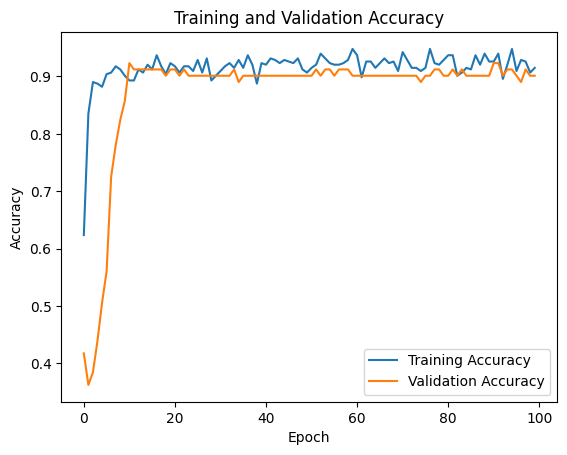

In [ ]:
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Plot the loss based on the Epoch

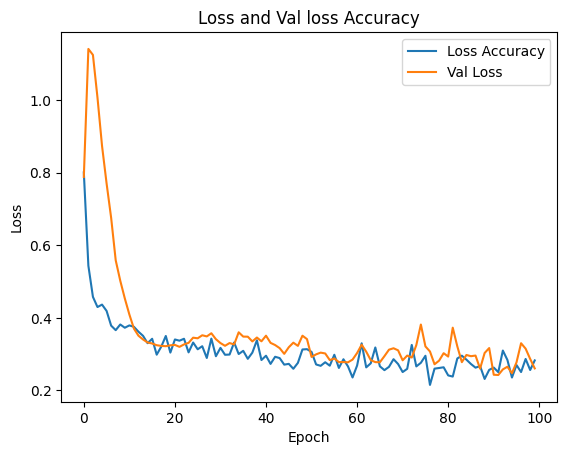

In [ ]:
plt.plot(loss, label='Loss Accuracy')
plt.plot(val_loss, label='Val Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss and Val loss Accuracy')
plt.legend()
plt.show()

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

Y_PRED = []
for i in y_predicted_val:
  if i > 0.5:
    Y_PRED.append(1)
  else:
    Y_PRED.append(0)

print(classification_report(y_test,Y_PRED))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Text(50.722222222222214, 0.5, 'Truth')

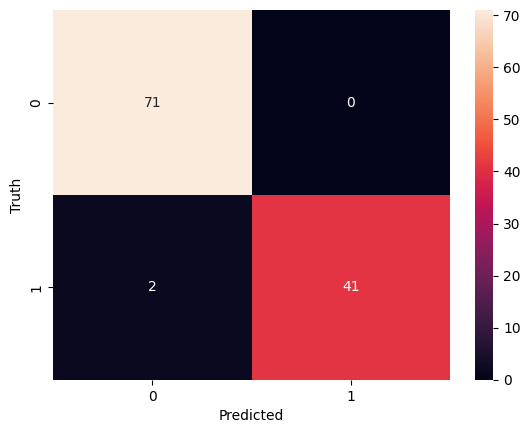

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test,Y_PRED)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#calculate the Accuracy,precision , recall and F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, Y_PRED)
precision = precision_score(y_test, Y_PRED)
recall = recall_score(y_test, Y_PRED)
f1 = f1_score(y_test, Y_PRED)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 Score: 0.9761904761904762
